<a href="https://colab.research.google.com/github/luan640/ANEEL_empreendimentos/blob/main/EDA_empreendimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Análise em Relação de empreendimentos de Geração Distribuída. Dataset extraído de: https://dadosabertos.aneel.gov.br/dataset/?q=&sort=views_recent+desc
#### Dicionário de dados se encontra em: https://dadosabertos.aneel.gov.br/dataset/relacao-de-empreendimentos-de-geracao-distribuida/resource/3fabb9e8-668a-4f94-8f0e-ed9cd2682979
#### Pequeno resumo sobre o dataset:
#### O presente documento trata de dados referentes aos micro e minigeradores distribuídos, abrangidos pela Resolução Normativa nº 482/2012. A relação dos empreendimentos é classificada pelas variáveis que compõem sua identificação, quais sejam: distribuidora conectada, o código do empreendimento, o núcleo numérico do código do empreendimento, o nome do titular, a classe de produção, subgrupo, o nome do titular, a quantidade de unidades consumidoras que recebem os créditos, a data da conexão, o tipo de unidade produtora, a fonte, a potência instalada, o município e unidade de federação onde está localizada. Os dados são expressos em quantidades e potência instalada em kW (quilowatt). A quantidade corresponde ao número de micro ou minigeradores distribuídos instalados no período especificado. A potência instalada é definida pelo somatório da potência elétrica ativa nominal das unidades geradoras. A unidade de energia elétrica atualmente utilizada pela ANEEL é o kWh (quilowatt-hora) ou o MWh (megawatt-hora).


## Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importando dados

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Database/empreendimento-geracao-distribuida.csv",
                 sep=';',
                 encoding='latin1',
                 error_bad_lines=False)

## Funções para auxiliar na análise

In [ ]:
def generate_metadata(dataframe):
    """
    Generates a DataFrame containing metadata for the columns of the provided DataFrame.

    :param dataframe: DataFrame for which metadata will be generated.
    :return: DataFrame containing metadata.
    """

    # Collection of basic metadata
    metadata = pd.DataFrame({
        'variable': dataframe.columns,
        'type': dataframe.dtypes,
        'null_count': dataframe.isnull().sum(),
        'null_percent': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinality': dataframe.nunique(),
    })
  # metadata = metadata.sort_values(by='type')
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
def generate_box_plots(dataframe):
    """
    Plots stylized boxplots with simplified titles for all numeric variables in the provided dataframe
    in a panel with 3 plots per row.

    :param dataframe: DataFrame for which boxplots will be generated.
    """

    # Select only numeric columns
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Calculate the number of rows based on the number of numeric columns
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Initialize the plot panel
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Adjust layout
    plt.tight_layout(pad=5)

    # Configure style and color palette
    sns.set_style("whitegrid")

    # Plot boxplots for each numeric column
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove empty plots (if any)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Add main title
    fig.suptitle("Descriptive Analysis - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

In [ ]:
def generate_histogram_with_kde(dataframe, column_name):
    """
    Plots a corrected histogram with Kernel Density Estimation (KDE) curve for the specified column in the DataFrame.

    :param dataframe: DataFrame containing the data.
    :param column_name: Name of the column to be plotted.
    """
    # Create a corrected histogram with KDE for the specified column
    plt.figure(figsize=(10, 6))
    sns.histplot(data=dataframe[column_name], color="skyblue", bins=30, kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [ ]:
def generate_bar_plot_frequency(df, column):
    """
    Plots the frequency of categories for a specified column in a DataFrame.

    Parameters:
    - df: DataFrame for plotting.
    - column: Name of the column to be plotted.

    Returns:
    - Displays a bar chart for the specified column.
    """

    # Calculate the frequency of categories and sort them by frequency in descending order
    category_counts = df[column].value_counts().sort_values(ascending=False)

    # Plot the specified categorical column sorted by frequency
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Frequency in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [ ]:
def generate_bar_plot_sales(df, column):
    """
    Plots the total sales (sum of 'QTD_VENDIDA') for each category in a specified column in a DataFrame.

    Parameters:
    - df: DataFrame for plotting.
    - column: Name of the column for which total sales will be plotted.

    Returns:
    - Displays a bar chart showing total sales for each category in the specified column.
    """

    # Calculate the total sales for each category and sort them by total sales in descending order
    total_sales = df.groupby(column)['QTD_VENDIDA'].sum().sort_values(ascending=False)

    # Plot the total sales for the specified categorical column sorted by total sales
    plt.figure(figsize=(10, 6))
    total_sales.plot(kind='bar', color='skyblue')
    plt.title(f'Total Sales by {column}')
    plt.xlabel(column)
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()

In [ ]:
def filter_top_20_by_column(df, column_name):
    # Group and count incidents by the specified column
    column_counts = df[column_name].value_counts().reset_index()
    column_counts.columns = [column_name, 'total_sales']

    # Sort values alphabetically
    column_counts = column_counts.sort_values(column_name)

    # Select and display the top 20 values with the highest total sales
    top_20_values = column_counts.nlargest(20, 'total_sales')

    # Extract unique values from the top 20
    top_20_unique_values = top_20_values[column_name].unique()

    # Filter the original DataFrame to include only the rows for the top 20 values
    filtered_df = df[df[column_name].isin(top_20_unique_values)]

    return filtered_df

In [ ]:
df

,DatGeracaoConjuntoDados,AnmPeriodoReferencia,NumCNPJDistribuidora,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,CodSubGrupoTarifario,DscSubGrupoTarifario,codUFibge,...,QtdUCRecebeCredito,SigTipoGeracao,DscFonteGeracao,DscPorte,MdaPotenciaInstaladaKW,NumCoordNEmpreendimento,NumCoordEEmpreendimento,NomSubEstacao,NumCoordESub,NumCoordNSub
0,2023-09-05,09/2023,4.065033e+12,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,2,Comercial,11,B3,12.0,...,1,UFV,Radiação solar,Microgeracao,"32,50","-67,85","-9,96",NaN,NaN,NaN
1,2023-09-05,09/2023,4.065033e+12,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,1,Residencial,9,B1,12.0,...,1,UFV,Radiação solar,Microgeracao,"4,00","-70,78","-8,15",NaN,NaN,NaN
2,2023-09-05,09/2023,4.065033e+12,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,2,Comercial,11,B3,12.0,...,1,UFV,Radiação solar,Microgeracao,"2,00",NaN,NaN,NaN,NaN,NaN
3,2023-09-05,09/2023,4.065033e+12,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,1,Residencial,9,B1,12.0,...,1,UFV,Radiação solar,Microgeracao,"2,00","-67,86","-9,95",NaN,NaN,NaN
4,2023-09-05,09/2023,4.065033e+12,ELETROACRE,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,1,Residencial,9,B1,12.0,...,1,UFV,Radiação solar,Microgeracao,"5,00","-67,87","-9,96",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095907,2023-09-05,09/2023,2.508603e+13,ETO,ENERGISA TOCANTINS DISTRIBUIDORA DE ENERGIA S.A.,4,Industrial,11,B3,17.0,...,10,UFV,Radiação solar,Microgeracao,"75,00","-11,89","-49,17",NaN,NaN,NaN
2095908,2023-09-05,09/2023,2.508603e+13,ETO,ENERGISA TOCANTINS DISTRIBUIDORA DE ENERGIA S.A.,1,Residencial,9,B1,17.0,...,1,UFV,Radiação solar,Microgeracao,"5,40",NaN,NaN,NaN,NaN,NaN
2095909,2023-09-05,09/2023,2.508603e+13,ETO,ENERGISA TOCANTINS DISTRIBUIDORA DE ENERGIA S.A.,1,Residencial,9,B1,17.0,...,1,UFV,Radiação solar,Microgeracao,"10,00",NaN,NaN,NaN,NaN,NaN
2095910,2023-09-05,09/2023,2.508603e+13,ETO,ENERGISA TOCANTINS DISTRIBUIDORA DE ENERGIA S.A.,1,Residencial,9,B1,17.0,...,1,UFV,Radiação solar,Microgeracao,"8,00",NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(2095912, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095912 entries, 0 to 2095911
Data columns (total 33 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   DatGeracaoConjuntoDados       object 
 1   AnmPeriodoReferencia          object 
 2   NumCNPJDistribuidora          float64
 3   SigAgente                     object 
 4   NomAgente                     object 
 5   CodClasseConsumo              int64  
 6   DscClasseConsumo              object 
 7   CodSubGrupoTarifario          int64  
 8   DscSubGrupoTarifario          object 
 9   codUFibge                     float64
 10  SigUF                         object 
 11  codRegiao                     float64
 12  NomRegiao                     object 
 13  CodMunicipioIbge              float64
 14  NomMunicipio                  object 
 15  CodCEP                        object 
 16  SigTipoConsumidor             object 
 17  NumCPFCNPJ                    object 
 18  NomeTitularEmpreendime

In [ ]:
df.describe(include='all')

,DatGeracaoConjuntoDados,AnmPeriodoReferencia,NumCNPJDistribuidora,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,CodSubGrupoTarifario,DscSubGrupoTarifario,codUFibge,...,QtdUCRecebeCredito,SigTipoGeracao,DscFonteGeracao,DscPorte,MdaPotenciaInstaladaKW,NumCoordNEmpreendimento,NumCoordEEmpreendimento,NomSubEstacao,NumCoordESub,NumCoordNSub
count,2095912,2095912,2.095770e+06,2095770,2095770,2.095912e+06,2095912,2.095912e+06,2095912,2.091772e+06,...,2.095912e+06,2095912,2095912,2095912,2095912,181419,181419,11824,11824,11824
unique,1,1,NaN,109,109,NaN,7,NaN,10,NaN,...,NaN,4,14,2,5988,4928,4158,1202,861,879
top,2023-09-05,09/2023,NaN,CEMIG-D,CEMIG DISTRIBUIÇÃO S.A,NaN,Residencial,NaN,B1,NaN,...,NaN,UFV,Radiação solar,Microgeracao,"5,00","-15,00","-56,00",SETD PORTA D'AGUA,"-43,33","-22,94"
freq,2095912,2095912,NaN,234260,234260,NaN,1644640,NaN,1632326,NaN,...,NaN,2095206,2095206,2084359,250943,3868,3647,382,711,550
mean,NaN,NaN,1.307787e+13,NaN,NaN,1.344696e+00,NaN,9.297612e+00,NaN,3.509768e+01,...,1.465191e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.606476e+13,NaN,NaN,7.322524e-01,NaN,7.546777e-01,NaN,9.840887e+00,...,1.795098e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.229747e+12,NaN,NaN,1.000000e+00,NaN,3.000000e+00,NaN,1.100000e+01,...,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.172213e+12,NaN,NaN,1.000000e+00,NaN,9.000000e+00,NaN,2.900000e+01,...,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,6.981180e+12,NaN,NaN,1.000000e+00,NaN,9.000000e+00,NaN,3.500000e+01,...,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.513963e+13,NaN,NaN,1.000000e+00,NaN,9.000000e+00,NaN,4.300000e+01,...,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Plot metadata for dataframe df_sales_november_2021
metadata_df = generate_metadata(df)
metadata_df

,variable,type,null_count,null_percent,cardinality
0,DatGeracaoConjuntoDados,object,0,0.00,1
1,AnmPeriodoReferencia,object,0,0.00,1
2,NumCNPJDistribuidora,float64,142,0.01,109
3,SigAgente,object,142,0.01,109
4,NomAgente,object,142,0.01,109
5,CodClasseConsumo,int64,0,0.00,7
6,DscClasseConsumo,object,0,0.00,7
7,CodSubGrupoTarifario,int64,0,0.00,10
8,DscSubGrupoTarifario,object,0,0.00,10
9,codUFibge,float64,4140,0.20,27


* 'NumCoordNEmpreendimento', NumCoordEEmpreendimento, 'NomSubEstacao', 'NumCoordESub', 'NumCoordNSub' São colunas que tem quase 100% dos valores nulos. Então serão excluídas do dataframe.

* O restante das colunas que contém algum valor nulo, suas linhas serão exluídas, pois apresentam um valor irrisório para o dataset.

In [ ]:
# Novo dataframe com as devidas limpezas de colunas e linhas nulas

df_clean = df.drop(columns={'NumCoordNEmpreendimento', 'NumCoordEEmpreendimento', 'NomSubEstacao',
                            'NumCoordESub', 'NumCoordNSub'})

df_clean.dropna(inplace = True)

In [ ]:
df_clean.shape

(2091440, 28)

In [ ]:
metadata_df = generate_metadata(df_clean)
metadata_df

,variable,type,null_count,null_percent,cardinality
0,DatGeracaoConjuntoDados,object,0,0.0,1
1,AnmPeriodoReferencia,object,0,0.0,1
2,NumCNPJDistribuidora,float64,0,0.0,109
3,SigAgente,object,0,0.0,109
4,NomAgente,object,0,0.0,109
5,CodClasseConsumo,int64,0,0.0,7
6,DscClasseConsumo,object,0,0.0,7
7,CodSubGrupoTarifario,int64,0,0.0,10
8,DscSubGrupoTarifario,object,0,0.0,10
9,codUFibge,float64,0,0.0,27


* Na coluna 'CodEmpreendimento' contém 20 valores a menos que o total do dataset. Pode ser que exista linhas duplicadas.

In [ ]:
# Verificando linhas duplicadas

df_clean.duplicated().sum()

0

* A coluna 'MdaPotenciaInstaladaKW' deveria ter seu type = float, não object.

In [ ]:
# Analisando algumas colunas para alterar seu tipo de dado

df_clean['MdaPotenciaInstaladaKW']

0          32,50
1           4,00
2           2,00
3           2,00
4           5,00
           ...  
2095907    75,00
2095908     5,40
2095909    10,00
2095910     8,00
2095911     3,33
Name: MdaPotenciaInstaladaKW, Length: 2091440, dtype: object

In [ ]:
# Alterando tipo de dado

df_clean['MdaPotenciaInstaladaKW'] = df_clean['MdaPotenciaInstaladaKW'].str.replace(",",".").astype(float)

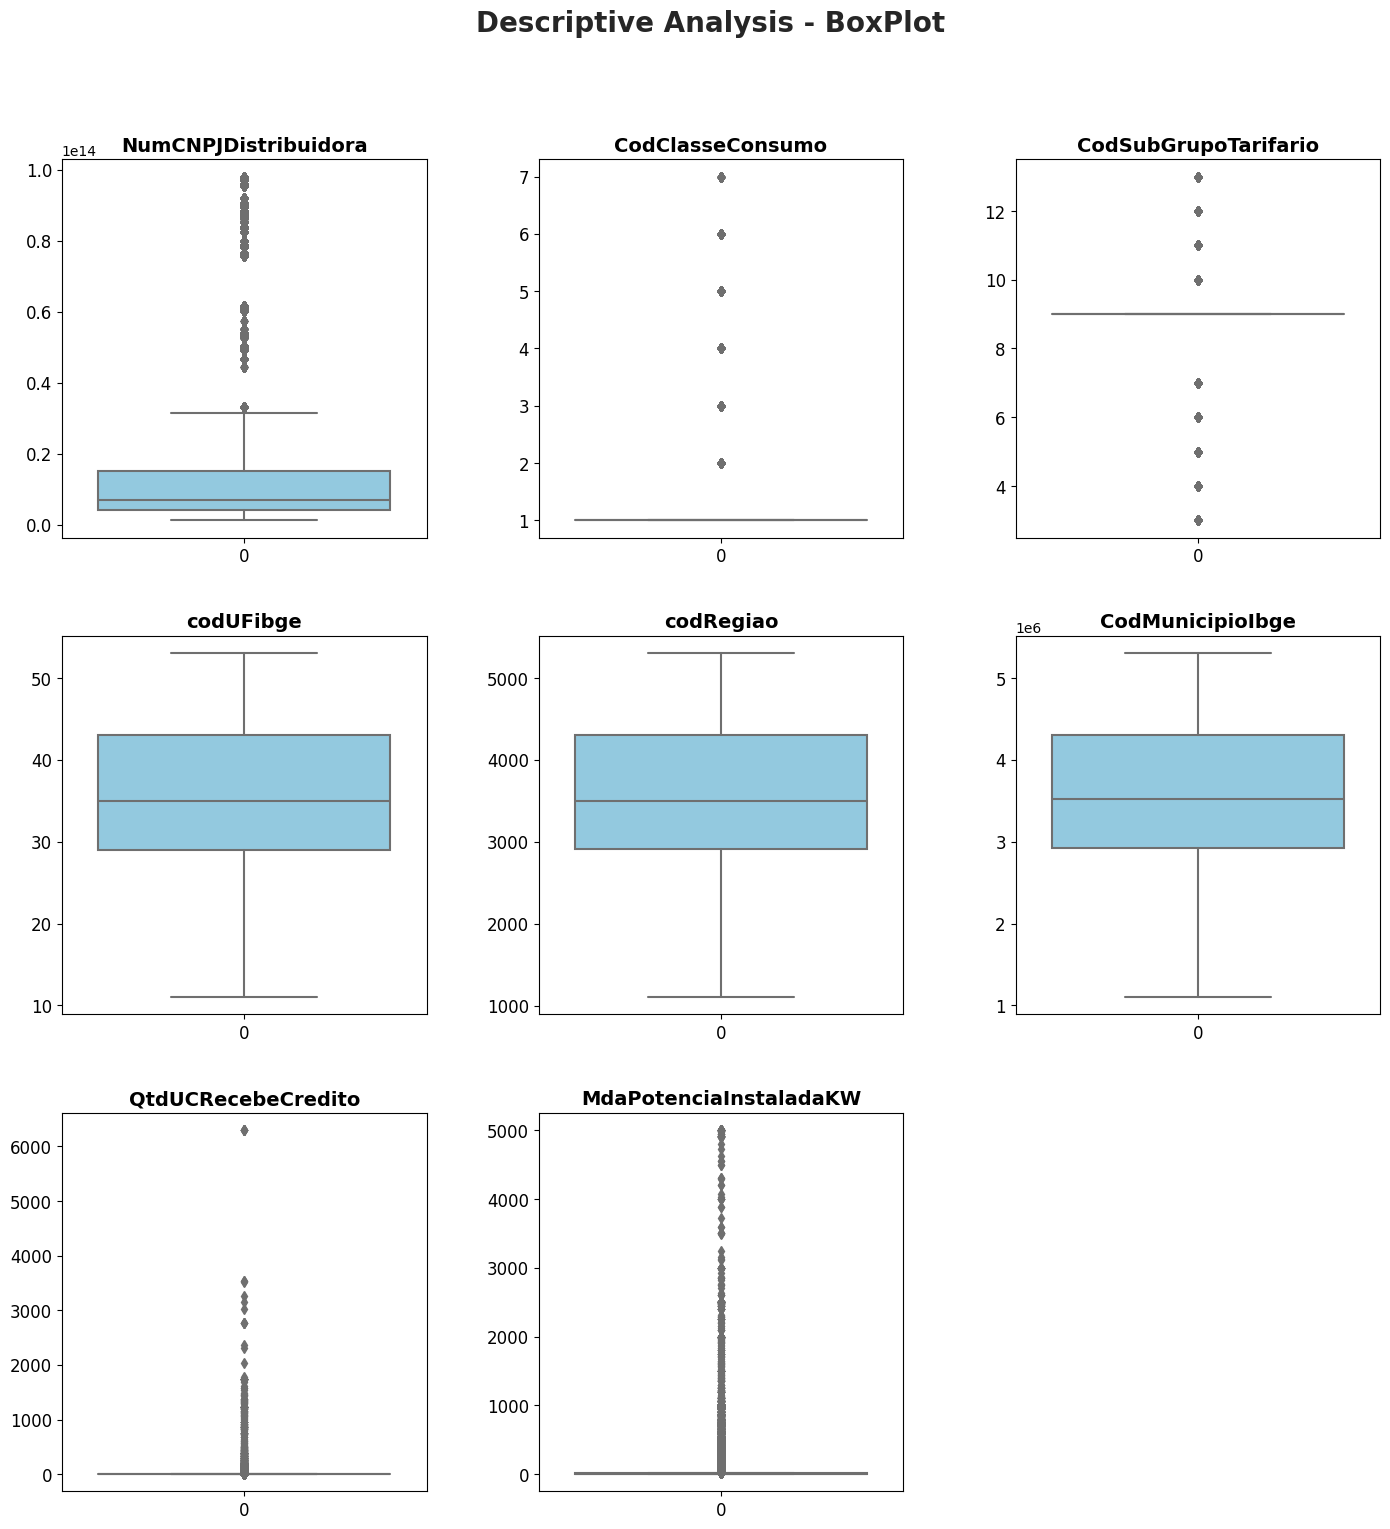

In [ ]:
# Plotando boxplots

generate_box_plots(df_clean)

* Apenas a coluna 'QtdUCRecebeCredito' será tratada, pois está apresentando alguns valores estranhos. Será definido um ponto de corte no valor de 3000, ou seja, todos os valores acima disso será descartado.

In [ ]:
df_clean['QtdUCRecebeCredito'] = df_clean['QtdUCRecebeCredito'].apply(lambda x: 1000 if x > 1000 else x)

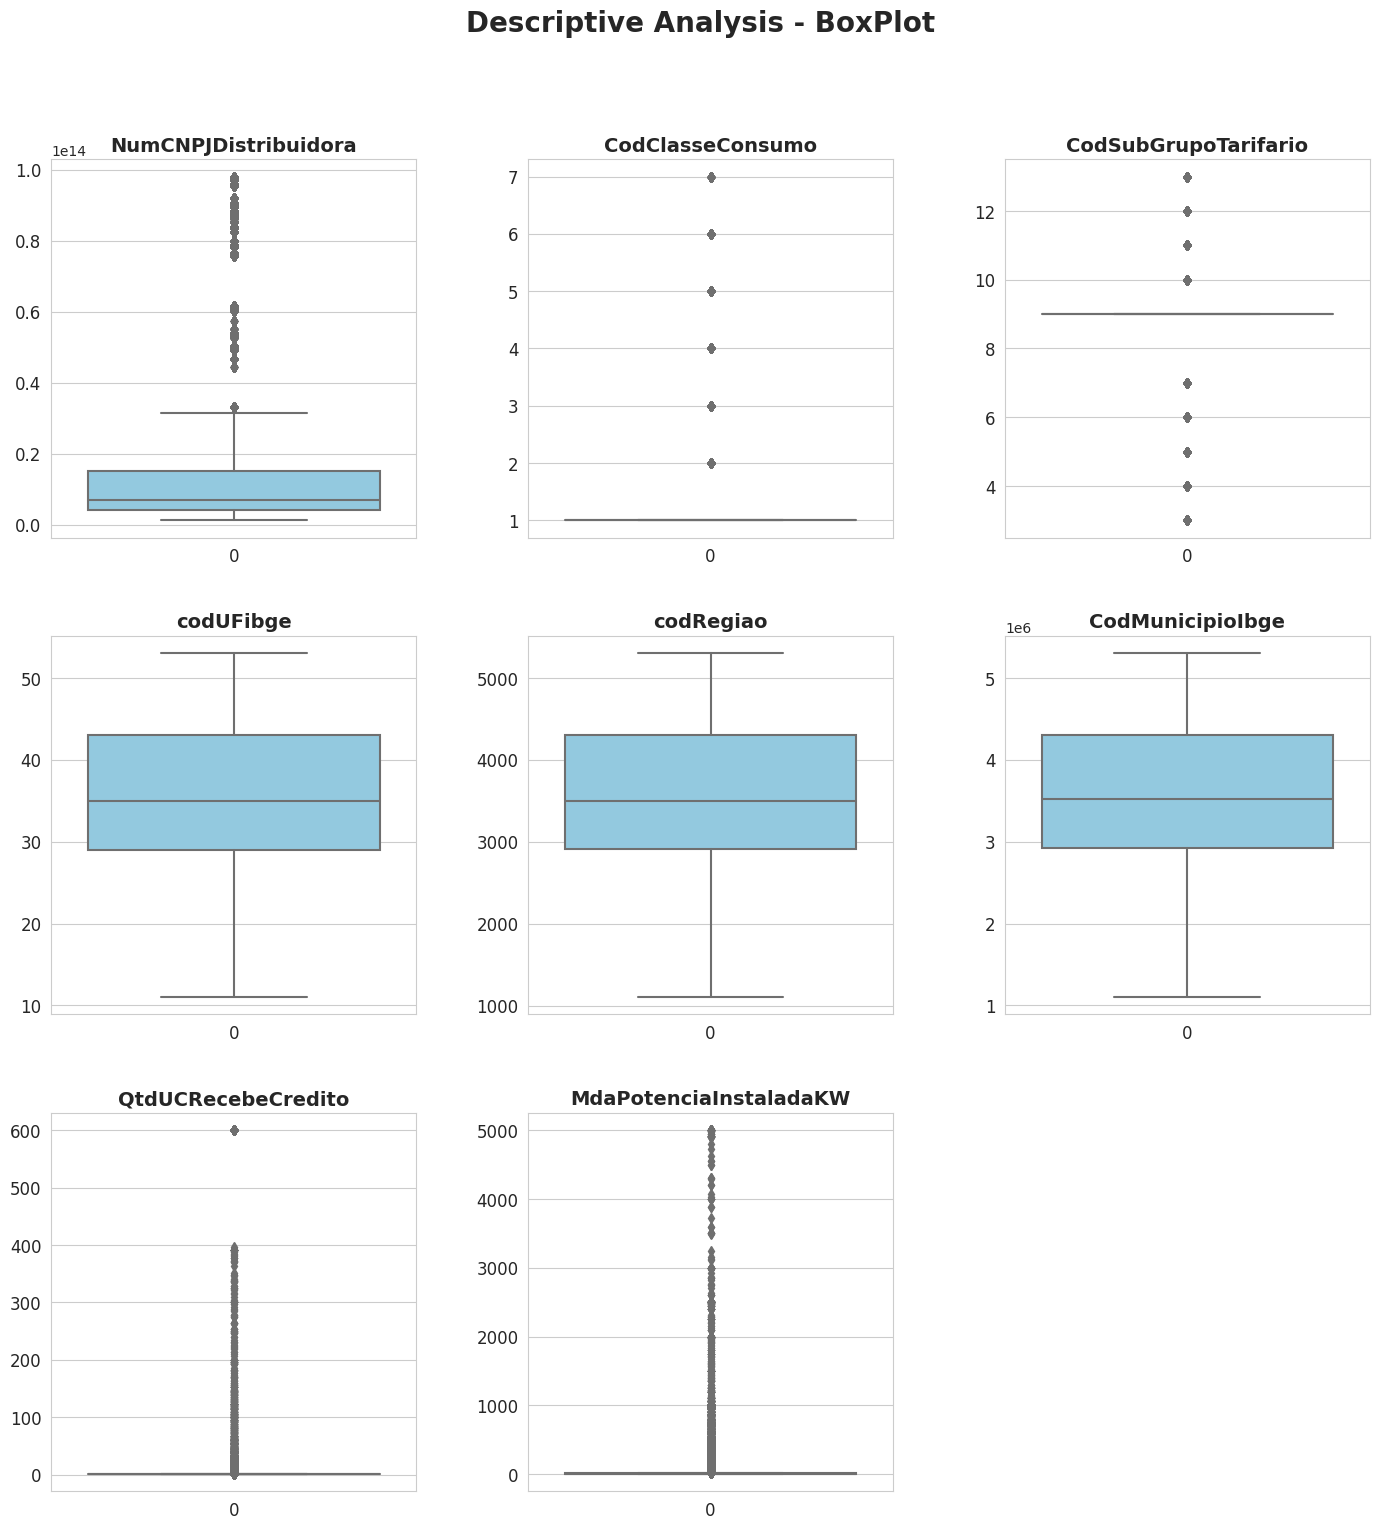

In [ ]:
generate_box_plots(df_clean)

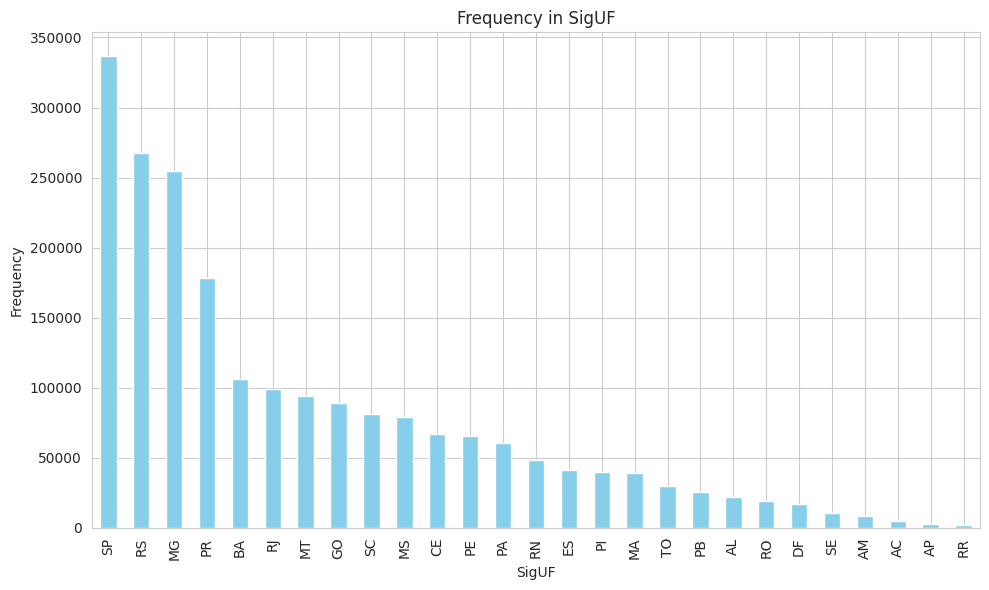

In [ ]:
# Plot bar para visualizar a frequência de UF.
generate_bar_plot_frequency(df_clean, 'SigUF')

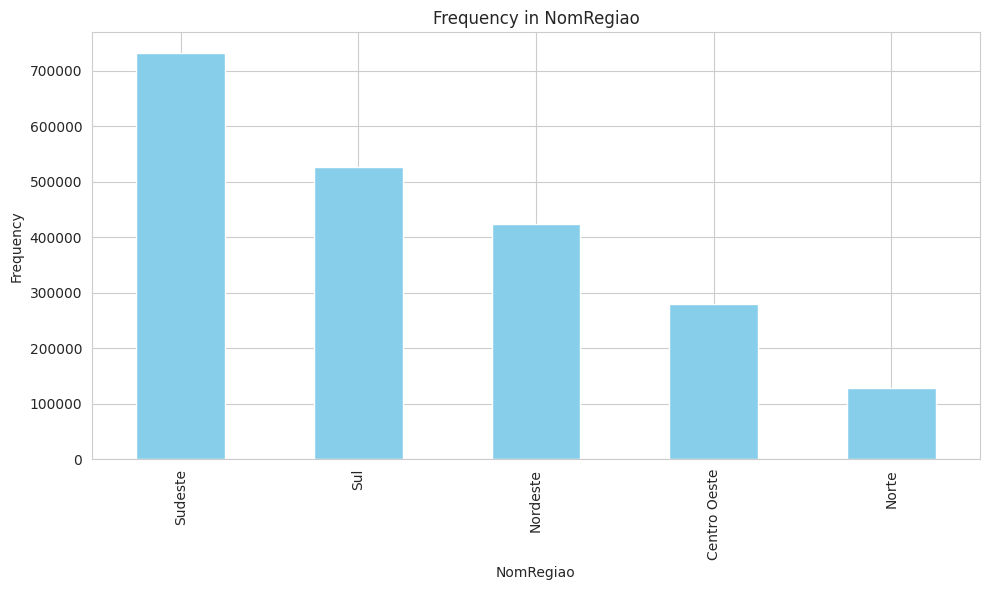

In [ ]:
generate_bar_plot_frequency(df_clean, 'NomRegiao')

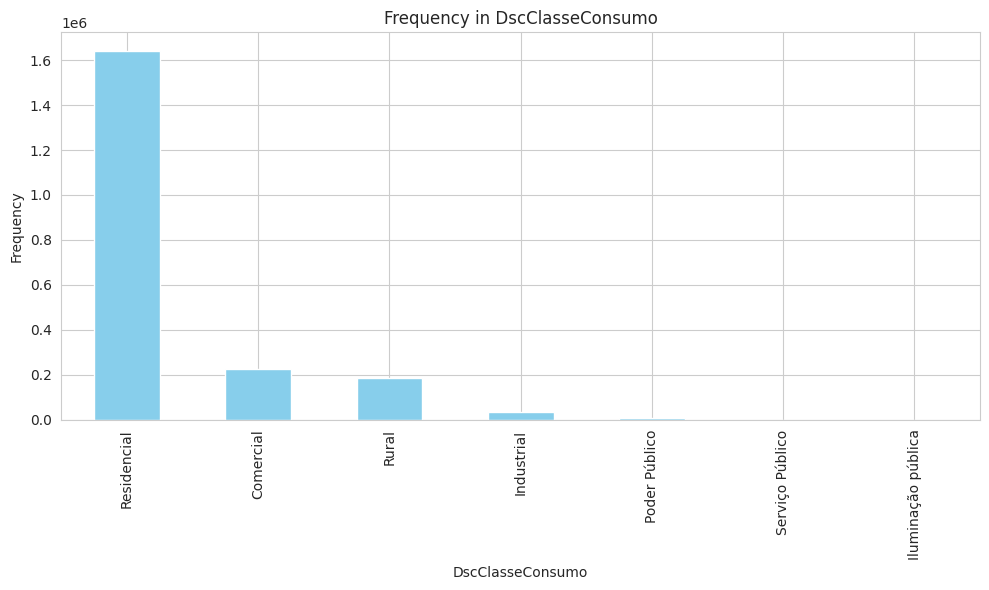

In [ ]:
generate_bar_plot_frequency(df_clean, 'DscClasseConsumo')

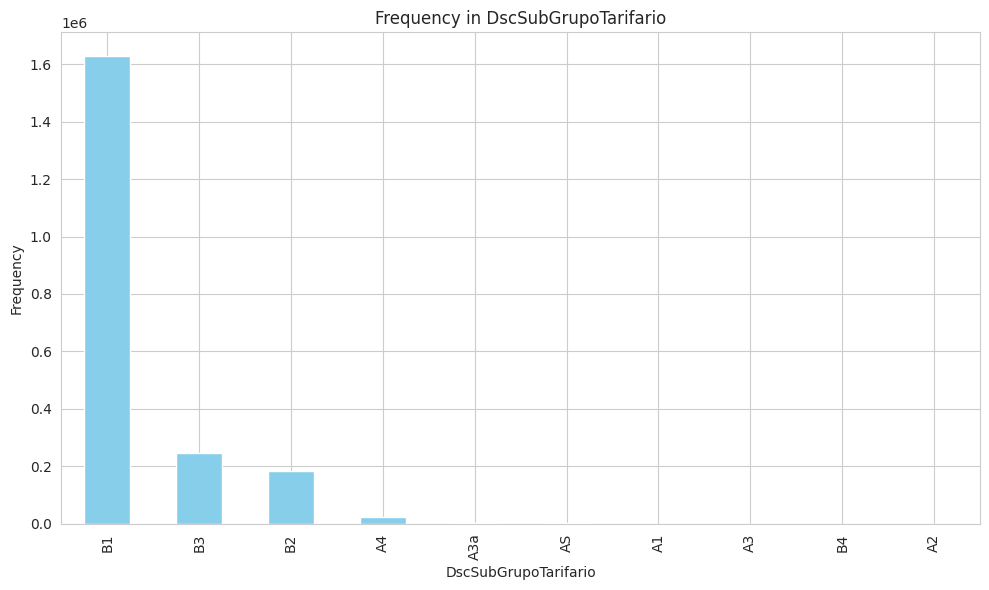

In [ ]:
generate_bar_plot_frequency(df_clean, 'DscSubGrupoTarifario')

* A1 – tensão de fornecimento igual ou superior a 230 kV;

* A2 – tensão de fornecimento de 88 kV a 138 kV;

* A3 – tensão de fornecimento de 69 Kv;

* A3a – tensão de fornecimento de 30 kV a 44 kV;

* A4 – tensão de fornecimento de 2,3 kV a 25 kV;

* AS – tensão de fornecimento inferior a 2,3 kV, a partir de sistema subterrâneo de distribuição;

* B1 – classe residencial;
* B2 – classe rural;
* B3 – demais classes;
* B4 – iluminação pública;




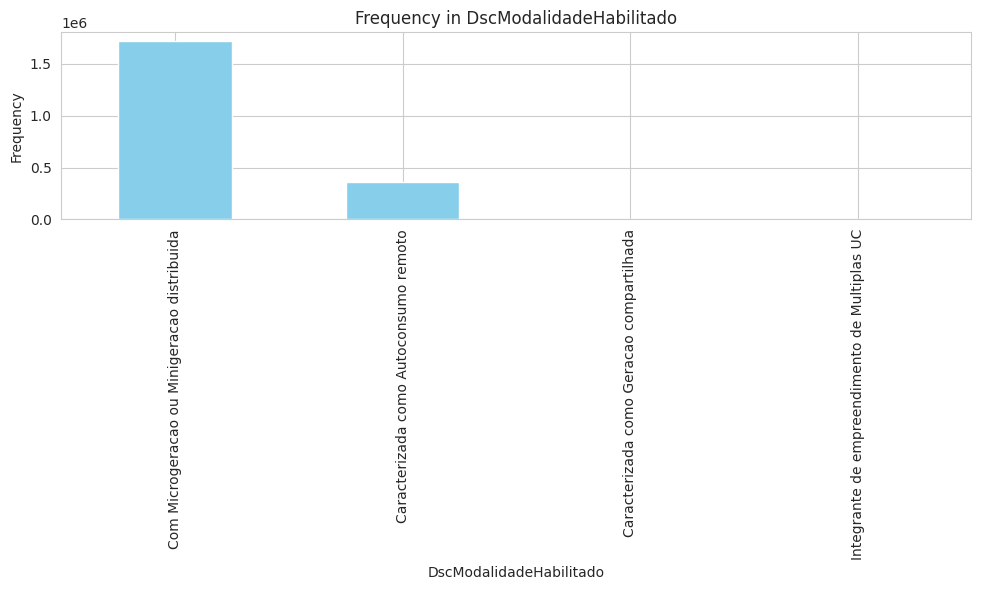

In [ ]:
generate_bar_plot_frequency(df_clean, 'DscModalidadeHabilitado')

* A maior concentração de empreendimentos se encontra na região Sudeste, especificamente na área de São Paulo.
* A maior frequência de grupo tarifário é o grupo B1, pois é voltado para a classe de consumo Residencial, onde também é a maior frequência.  

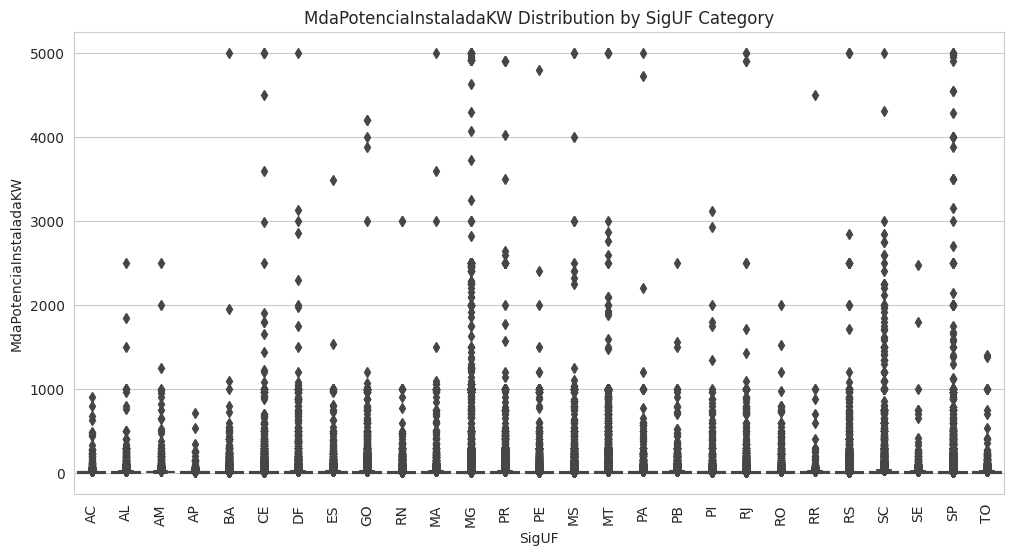

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='SigUF', y='MdaPotenciaInstaladaKW', data=df_clean)
plt.title('MdaPotenciaInstaladaKW Distribution by SigUF Category')
plt.xticks(rotation=90)
plt.show()